In [49]:
#import libralies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

#Read in the data
df = pd.read_csv('movies.csv')

In [50]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [51]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [52]:
#Change float to integer
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)
df['votes'] = df['votes'].fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [53]:
#Move 'gross' column to the first colum to see it easlily
dfgross = df.pop('gross')
df.insert(0, 'gross', dfgross)
df.head()

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,46998772,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,Warner Bros.,146
1,58853106,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,Columbia Pictures,104
2,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,Lucasfilm,124
3,83453539,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,Paramount Pictures,88
4,39846344,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,Orion Pictures,98


In [54]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
5445,2847246203,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,Twentieth Century Fox,162
7445,2797501328,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,Marvel Studios,181
3045,2201647264,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,Twentieth Century Fox,194
6663,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,Lucasfilm,138
7244,2048359754,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,Gibraltar Entertainment,92
1614,0,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,Allied Vision,85
1606,0,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,Trans World Entertainment (TWE),89
1601,0,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,Budapest Stúdió Vállalat,104


In [91]:
#Drop any duplication
df['company'].drop_duplicates().head()

5445    2253
7445    1606
6663    1540
7480    2316
6653    2281
Name: company, dtype: int16

In [56]:
df.head()

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
0,46998772,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,Warner Bros.,146
1,58853106,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,Columbia Pictures,104
2,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,Lucasfilm,124
3,83453539,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,Paramount Pictures,88
4,39846344,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,Orion Pictures,98


In [57]:
# Budget hight correlation
# Company hight correlation

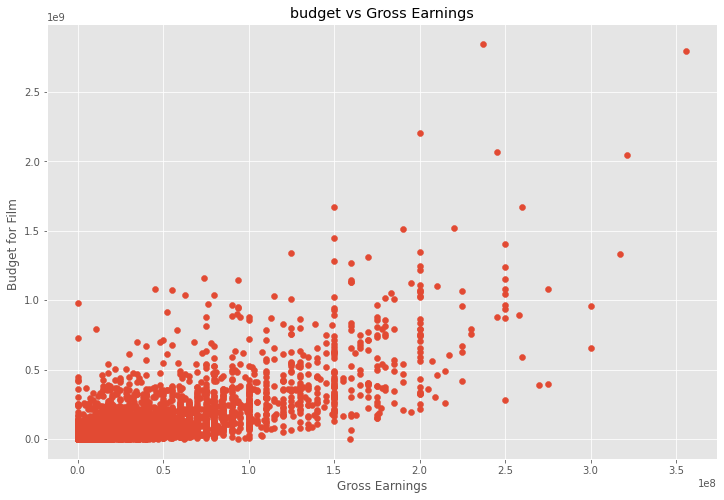

In [61]:
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film ')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

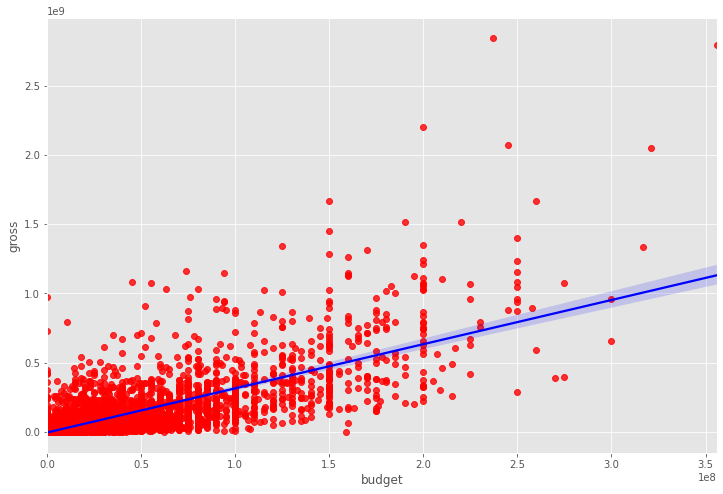

In [65]:
#plot budget vs gross using seaborn

sns.regplot(x ='budget', y='gross', data=df, 
            scatter_kws= {'color': 'red'}, line_kws={'color':'blue'})

In [67]:
#Start looking at correlation

df.corr(method='pearson')

,gross,year,score,votes,budget,runtime
gross,1.000000,0.261900,0.186392,0.632870,0.750157,0.244339
year,0.261900,1.000000,0.097995,0.222427,0.309212,0.116358
score,0.186392,0.097995,1.000000,0.409182,0.055665,0.398387
votes,0.632870,0.222427,0.409182,1.000000,0.486931,0.306984
budget,0.750157,0.309212,0.055665,0.486931,1.000000,0.268372
runtime,0.244339,0.116358,0.398387,0.306984,0.268372,1.000000


As you can see above, gross has high correlation with budget.

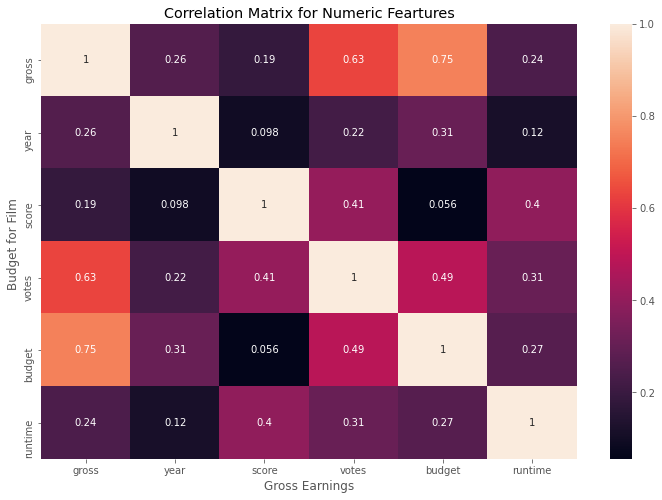

In [69]:
#High correlation between budget and gross

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Feartures')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film ')
plt.show()

In [92]:
#Looks at company

df['company'].head()

5445    2253
7445    1606
3045    2253
6663    1540
7244    1606
Name: company, dtype: int16

In [93]:
#Turn strings to numbers
df = df.sort_values(by=['gross'], inplace=False, ascending = False)
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()        

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
5445,2847246203,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2253,162
7445,2797501328,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,1606,181
3045,2201647264,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2253,194
6663,2069521700,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,1540,138
7244,2048359754,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,1606,149


In [80]:

df

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
5445,2847246203,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2253,162
7445,2797501328,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,1606,181
3045,2201647264,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2253,194
6663,2069521700,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,1540,138
7244,2048359754,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0,7211,6,3,1987,845,6.6,3300,66,3780,701,55,5800000,1323,94
1199,0,7208,4,4,1987,83,4.8,1400,1877,3645,462,55,0,1637,86
1192,0,7336,6,10,1987,1754,6.2,2200,745,682,596,54,0,1681,110
1184,0,1355,6,10,1987,2914,4.0,2100,613,925,1627,55,75000,2219,72


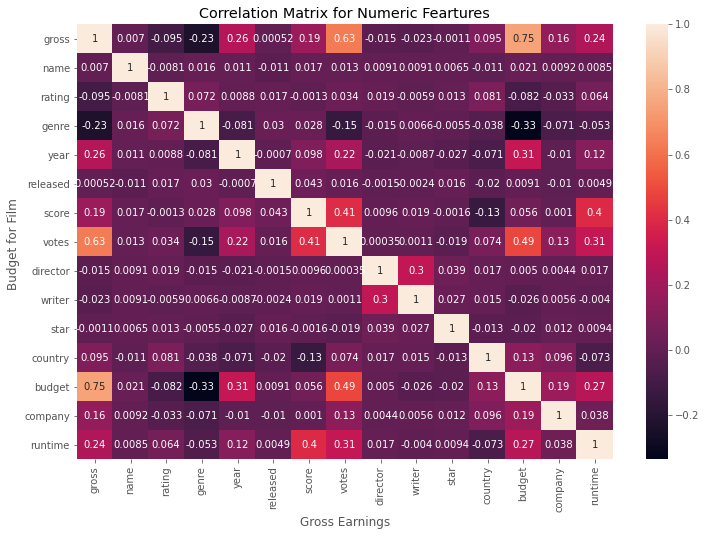

In [81]:
#High correlation between budget and gross

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Feartures')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film ')
plt.show()

vote and gross

In [82]:
df_numerized.corr()

,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,company,runtime
gross,1.000000,0.006989,-0.095450,-0.234297,0.261900,0.000519,0.186392,0.632870,-0.014916,-0.022997,-0.001129,0.095325,0.750157,0.156745,0.244339
name,0.006989,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.009211,0.008483
rating,-0.095450,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.032943,0.064133
genre,-0.234297,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.071067,-0.052914
year,0.261900,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,-0.010431,0.116358
released,0.000519,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,-0.010474,0.004852
score,0.186392,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.001030,0.398387
votes,0.632870,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.133457,0.306984
director,-0.014916,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,0.004404,0.017062
writer,-0.022997,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,0.005646,-0.004036


In [83]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

gross    gross      1.000000
         name       0.006989
         rating    -0.095450
         genre     -0.234297
         year       0.261900
                      ...   
runtime  star       0.009418
         country   -0.073319
         budget     0.268372
         company    0.037537
         runtime    1.000000
Length: 225, dtype: float64

In [87]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
          gross      -0.234297
gross     genre      -0.234297
genre     votes      -0.145296
votes     genre      -0.145296
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095450
gross     rating     -0.095450
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
runtime   country    -0.073319
country   runtime    -0.073319
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
genre     runtime    -0.052914
runtime   genre      -0.052914
genre     country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
          gross      -0.022997
gross     writer     -0.022997
year    

In [86]:
pd.set_option('display.max_rows', None)

gross     votes       0.632870
budget    gross       0.750157

In [90]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
gross     gross       1.000000
votes     votes       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
name      name        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the higest correlation to gross earning

#Company has low correlation